In [1]:
import coltrims
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget

In [2]:
#df = pd.read_csv(r"D:\ELCH-Programm\dataCOfull.zip")
df = pd.read_pickle(r"D:\ELCH-Programm\dataCOfull-pos.zip")

In [3]:
specElec = coltrims.Spectrometer()
specElec.magneticField = 6.0
specElec.addRegion(57, 57.4)
specElec.addRegion(117, 0)

In [4]:
specIon = coltrims.Spectrometer()
specIon.magneticField = 6.
specIon.addRegion(None, 57.4)

In [5]:
reaction = coltrims.Reaction(electronSpectrometer=specElec, ionSpectrometer=specIon)

reaction.add_elec(df["e1x"], df["e1y"], df["e1tof"])

reaction.add_ion(df["r1x"], df["r1y"], df["r1tof"], m=12, q=1, tofMean=3340.0)
reaction.add_ion(df["r2x"], df["r2y"], df["r2tof"], m=16, q=1, tofMean=3865.0)

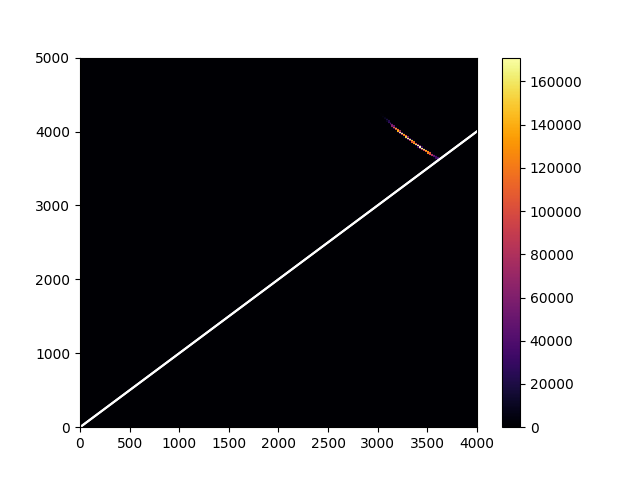

In [6]:
# Pipico
plt.close()
_,x,y,_ = plt.hist2d(reaction.i[0].tof, reaction.i[1].tof, bins=(200,300), range=((0, 4000), (0,5000)), cmap="inferno")
plt.plot(x,x,c="white")
plt.plot(y,y,c="white")
plt.colorbar()
#plt.grid("both")
plt.show()

Linear Case!
Linear Approximation!
57.4 [3518.50367224 3469.45546564 3447.04554941 ... 3353.24045511 3592.5253103
 3494.06626308] 3340.0
Linear Case!
Linear Approximation!
57.4 [3699.09038732 3757.902088   3783.06228333 ... 3858.59347949 3654.0384447
 3719.39636502] 3865.0


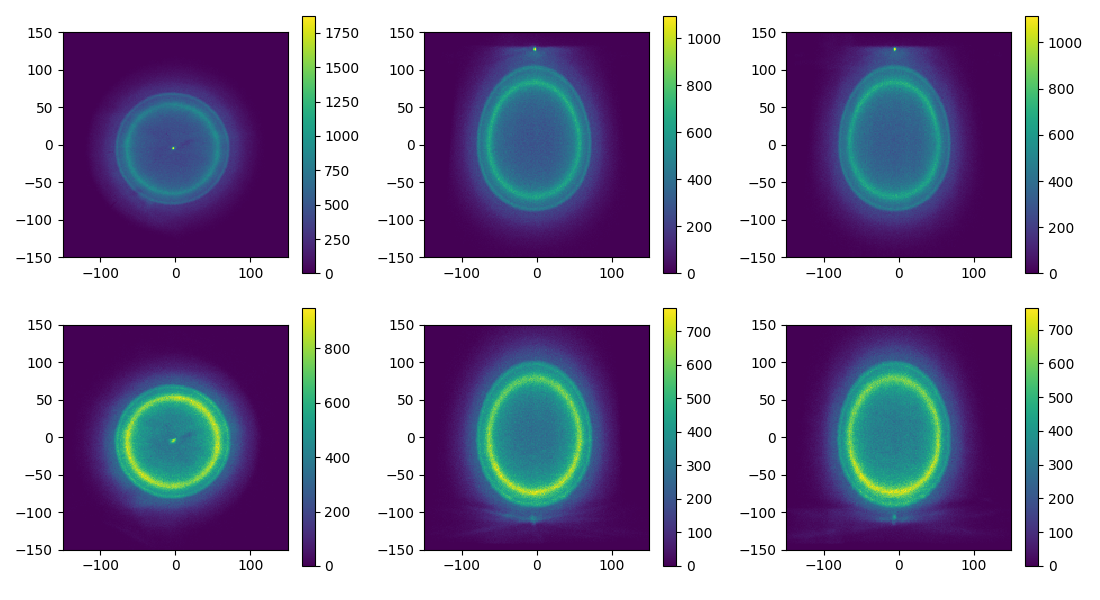

No such comm: e4b90a8f5e1044d5b2661452b75ba01f


In [7]:
# Ion Momenta
plt.close()
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(nrows=2, ncols=3, figsize=(11,6))

# Ion 0
# x-y
_,_,_,plot = ax11.hist2d(reaction.i[0].px, reaction.i[0].py, bins=(200,200), range=((-150,150), (-150,150)))
ax11.set_aspect("equal")
plt.colorbar(plot, ax=ax11)
# x-z
_,_,_,plot = ax12.hist2d(reaction.i[0].px, reaction.i[0].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax12.set_aspect("equal")
plt.colorbar(plot, ax=ax12)
# y-z
_,_,_,plot = ax13.hist2d(reaction.i[0].py, reaction.i[0].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax13.set_aspect("equal")
plt.colorbar(plot, ax=ax13)

# Ion 1
# x-y
_,_,_,plot = ax21.hist2d(reaction.i[1].px, reaction.i[1].py, bins=(200,200), range=((-150,150), (-150,150)))
ax21.set_aspect("equal")
plt.colorbar(plot, ax=ax21)
# x-z
_,_,_,plot = ax22.hist2d(reaction.i[1].px, reaction.i[1].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax22.set_aspect("equal")
plt.colorbar(plot, ax=ax22)
# y-z
_,_,_,plot = ax23.hist2d(reaction.i[1].py, reaction.i[1].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax23.set_aspect("equal")
plt.colorbar(plot, ax=ax23)

fig.tight_layout()
plt.show()

6034392 0


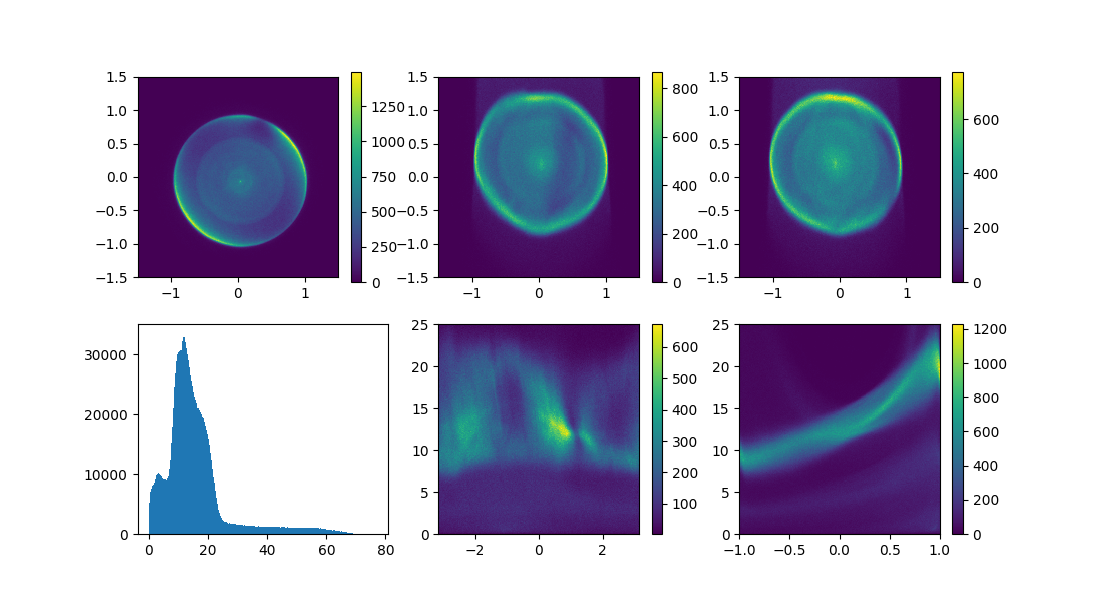

No such comm: 364277db4775426eaa90e40ef68a7573


In [8]:
# Electron Momenta
plt.close()
fig, ((ax31, ax32, ax33),(ax41, ax42, ax43)) = plt.subplots(nrows=2, ncols=3, figsize=(11,6))

# Electron 0
# x-y
_,_,_,plot = ax31.hist2d(reaction.e[0].px, reaction.e[0].py, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax31.set_aspect("equal")
plt.colorbar(plot, ax=ax31)
# x-z
_,_,_,plot = ax32.hist2d(reaction.e[0].px, reaction.e[0].pz, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax32.set_aspect("equal")
plt.colorbar(plot, ax=ax32)
# y-z
_,_,_,plot = ax33.hist2d(reaction.e[0].py, reaction.e[0].pz, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax33.set_aspect("equal")
plt.colorbar(plot, ax=ax33)
# Energy
ax41.hist(reaction.e[0].energy, bins=1000)
#ax41.grid("both")
# Energy-phi
#_,_,_,plot = ax42.hist2d(np.arctan2(reaction.e[0].py, reaction.e[0].py), reaction.e[0].energy, bins=(200,200), range=((-2*np.pi,2*np.pi),(0, 10)))
_,_,_,plot = ax42.hist2d(np.arctan2(reaction.e[0].py, reaction.e[0].px), reaction.e[0].energy, bins=(200,200), range=((-np.pi,np.pi),(0, 25)))
plt.colorbar(plot, ax=ax42)
# Energy-cosTheta
_,_,_,plot = ax43.hist2d(reaction.e[0].pz/reaction.e[0].p, reaction.e[0].energy, bins=(200,200), range=((-1,1),(0,25)))
plt.colorbar(plot, ax=ax43)

plt.show()

In [9]:
momDiff    = reaction.i[0] - reaction.i[1]
angleLight = np.arccos(momDiff*[0,1,0] / (momDiff.p + 1))

In [10]:
plt.close()

plt.show()

array([2.20543032, 1.83631306, 0.63451141, ..., 0.49995297, 1.41597604,
       1.67338006])